# Тестирование и python

В этой лекции мы познакомимся тестированием на `python` реализовав небольшую кату по TDD (test-driven developement)

## 1. TDD и каты.

TDD - test-driven developement или разработка через тестирование. Достигается соблюдением трех правил.

**Три правила TDD**:

 - Продакшн-код можно писать только для починки падающего теста
 - В тесте нужно писать ровно столько кода, сколько необходимо чтобы он упал. Ошибки компиляции считаются падениями теста.
 - В прод можно написать ровно столько кода, сколько требуется для починки дного падающего теста.


Получается следйющий пайплайн - пишем падающий тест, пишем код чтобы тест не падал, рефакторим код так, чтобы тесты не падали. Повторяем до сходимости.

Есть пара книжек по теме:

1. [Test Driven Development: By Example 1st Edition](https://www.eecs.yorku.ca/course_archive/2003-04/W/3311/sectionM/case_studies/money/KentBeck_TDD_byexample.pdf)
2. [On Growing Object Oriented Software, Guided by Tests](https://www.amazon.com/Growing-Object-Oriented-Software-Guided-Tests/dp/0321503627)

К прочтению рекомендуется вторая, т.к. она более приближена к разработческим реалиям.

### Каты

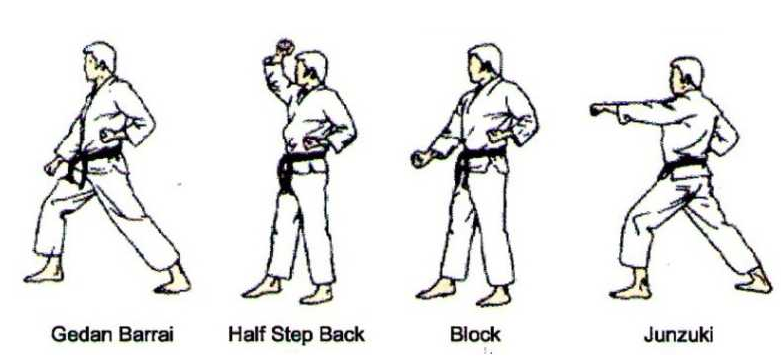

Каты - упражнения по программированию, помогающие отточить навыки путем многократного повторнеия. Концепция взята из японских боевых искусств. Подробнее про них можно почитать в книжке [The Pragmatic Programmer](https://pragprog.com/titles/tpp20/the-pragmatic-programmer-20th-anniversary-edition/)



**Ката Greeter**

Данную кату надо выполнять строго по пунктам, не заглядывая вперед:

- Создайте класс `Greeter`, у которого есть метод `greet` принимающий на вход имя и возвращающий "Hello <имя>".
- Метод `greet` должен убирать лишние пробелы - в начале и в конце имени
- Метод `greet` должен возвращать ошибку если имя - пустая строка (или строка с пробелами)
- Метод `greet` возвращает "Good evening <имя>" если текущее время - 18:00-22:00

## 2. Первый тест

Для автоматизированного тестирования написано много фреймворков на разных языках. Короткий список для python:

* [unittest](https://docs.python.org/3/library/unittest.html)
* [nose2](https://docs.nose2.io/en/latest/)
* [pytest](https://docs.pytest.org/en/latest/)

В рамках лекции мы остановимся на `pytest`.

In [1]:
# Настраиваем ноутбук
import pytest
import ipytest
ipytest.config(rewrite_asserts=True, magics=True)
__file__ = "Testing.ipynb"

#### Как pytest находит тесты:

1. Рекурсивно находит все python-файлы в текущей директории
2. Оставляет только файлы вида `test_*.py` и `*_test.py`
3. В этих файлах
  1. Находит все функции с префиксом `test`
  2. Находит все методв с префиксом `test` внутри классов с префиксом `Test`. У классов не должно быть метода `__init__`
  
Поведение можно модифицировать. [Подробнее в документации](https://docs.pytest.org/en/stable/goodpractices.html#test-discovery)

Напишем минимальный тест 

In [2]:
%%run_pytest[clean] -q

def test_greeter():
    Greeter()

F                                                                                                                                                                                                           [100%]
==================================================================================================== FAILURES =====================================================================================================
__________________________________________________________________________________________________ test_greeter ___________________________________________________________________________________________________

    def test_greeter():
>       Greeter()
E       NameError: name 'Greeter' is not defined

<ipython-input-2-f0bf3d5080f2>:2: NameError
============================================================================================= short test summary info =============================================================================================
FAILED Testing.p

`pytest` выводит отчет, в котором можно посмотреть сколько у нас всего тестов, какие из них упали и по какой причине. 

Теперь сделаем так чтобы тест проходил

In [3]:
class Greeter:
    pass

In [4]:
%%run_pytest[clean] -q

def test_greeter():
    Greeter()

.                                                                                                                                                                                                           [100%]
1 passed in 0.00s


Еще одна итерация tdd

In [5]:
%%run_pytest[clean] -q

def test_greeter():
    Greeter().greet("Mike")

F                                                                                                                                                                                                           [100%]
==================================================================================================== FAILURES =====================================================================================================
__________________________________________________________________________________________________ test_greeter ___________________________________________________________________________________________________

    def test_greeter():
>       Greeter().greet("Mike")
E       AttributeError: 'Greeter' object has no attribute 'greet'

<ipython-input-5-86bee5d034fc>:2: AttributeError
============================================================================================= short test summary info ==========================================================================

In [6]:
class Greeter:
    def greet(self, name):
        return ""

In [7]:
%%run_pytest[clean] -q

def test_greeter():
    Greeter().greet("Mike")

.                                                                                                                                                                                                           [100%]
1 passed in 0.00s


Теперь наконец-то напишем нормальный тест, воспользовавшись основной фишкой `Pytest` - `assert`. `Pytest` находит все вызовы `assert` в коде тестов, а затем переписывает этот код так, чтобы в случае падения пользователь мог получить удобный дифф и трейсбек.

- [Демки разных аасертов](https://docs.pytest.org/en/stable/example/reportingdemo.html#tbreportdemo)
- [Цикл статей про то, как это работает](https://www.pythoninsight.com/2018/01/assertion-rewriting-in-pytest-part-1/)

In [8]:
%%run_pytest[clean] -q

def test_greeter():
    assert Greeter().greet("Mike") == "Hello Mike"

F                                                                                                                                                                                                           [100%]
==================================================================================================== FAILURES =====================================================================================================
__________________________________________________________________________________________________ test_greeter ___________________________________________________________________________________________________

    def test_greeter():
>       assert Greeter().greet("Mike") == "Hello Mike"
E       AssertionError: assert '' == 'Hello Mike'
E         - Hello Mike

<ipython-input-8-bb8ac158b55d>:2: AssertionError
============================================================================================= short test summary info ============================================

Починим тест

In [9]:
class Greeter:
    def greet(self, name):
        return "Hello Mike"

In [10]:
%%run_pytest[clean] -q

def test_greeter():
    assert Greeter().greet("Mike") == "Hello Mike"

.                                                                                                                                                                                                           [100%]
1 passed in 0.00s


## 2. Параметризация

Наша реализация представляет собой немного не то что мы хотели. Наверное стоит добавить больше разных тестов.
Чтобы не копировать один и тот же тест, можно воспользоваться параметризацией:

In [11]:
%%run_pytest[clean] -q
test_cases = [("Mike", "Hello Mike"), ("John", "Hello John"), ("Greg", "Hello Greg")]

@pytest.mark.parametrize("name, greeting", test_cases)
def test_greeter(name, greeting):
    assert Greeter().greet(name) == greeting

.FF                                                                                                                                                                                                         [100%]
==================================================================================================== FAILURES =====================================================================================================
__________________________________________________________________________________________ test_greeter[John-Hello John] __________________________________________________________________________________________

name = 'John', greeting = 'Hello John'

    @pytest.mark.parametrize("name, greeting", test_cases)
    def test_greeter(name, greeting):
>       assert Greeter().greet(name) == greeting
E       AssertionError: assert 'Hello Mike' == 'Hello John'
E         - Hello John
E         + Hello Mike

<ipython-input-11-e1e045608403>:5: AssertionError
_____________________

Видим отчеты пайтеста во всей красе. Починим тесты:

In [12]:
class Greeter:
    def greet(self, name):
        return "Hello " + name

In [13]:
%%run_pytest[clean] -q
test_cases = [("Mike", "Hello Mike"), ("John", "Hello John"), ("Greg", "Hello Greg")]

@pytest.mark.parametrize("name, greeting", test_cases)
def test_greeter(name, greeting):
    assert Greeter().greet(name) == greeting

...                                                                                                                                                                                                         [100%]
3 passed in 0.01s


Перейдем к следующему пункту нашего задания:

- Метод `greet` должен убирать лишние пробелы - в начале и в конце имени

Опять же, напишем тест:

In [14]:
%%run_pytest[clean] -q

def test_spaces():
    greeter = Greeter()
    greeting = greeter.greet(" Mike")
    assert not greeting.startswith(" ")

.                                                                                                                                                                                                           [100%]
1 passed in 0.00s


Обратим внимание что тест проходит и возникает соблазн продолжить работу. Однако если посмотреть на тест внимательно - можно увидеть в нем ошибку.


Чтобы не наступать на такие грабли существует **правило** - только что написанный тест должен падать, при чем именно из-за того поведения, которое этот тест должен было покрыть.


Вы можете писать тесты на уже существующий код - в таком случае они могут не падать т.к. код уже работает как надо. Тогда есть два варианта:
* Сделать в продовом коде баг чтобы тест упал
* Обратить проверяемое условие в тесте

Поправим наш тест:

In [15]:
%%run_pytest[clean] -q

def test_spaces():
    greeter = Greeter()
    greeted_name = greeter.greet(" Mike").split(" ", 1)[1]
    
    assert not greeted_name.startswith(" ")

F                                                                                                                                                                                                           [100%]
==================================================================================================== FAILURES =====================================================================================================
___________________________________________________________________________________________________ test_spaces ___________________________________________________________________________________________________

    def test_spaces():
        greeter = Greeter()
        greeted_name = greeter.greet(" Mike").split(" ", 1)[1]
    
>       assert not greeted_name.startswith(" ")
E       AssertionError: assert not True
E        +  where True = <built-in method startswith of str object at 0x7f6f2e967470>(' ')
E        +    where <built-in method startswith of str object at 0

Починим тест

In [16]:
class Greeter:
    def greet(self, name):
        if name.startswith(" "):
            name = name[1:] 
        return "Hello " + name

In [17]:
%%run_pytest[clean] -q

def test_spaces():
    greeter = Greeter()
    greeted_name = greeter.greet(" Mike").split(" ", 1)[1]
    
    assert not greeted_name.startswith(" ")

.                                                                                                                                                                                                           [100%]
1 passed in 0.00s


Перечитаем наше задание:
* Метод greet должен убирать лишние пробелы - в начале и **в конце имени**

Видимо нам нужно расширить тест:

In [18]:
%%run_pytest[clean] -q

def test_spaces():
    greeter = Greeter()
    greeted_name = greeter.greet(" Mike ").split(" ", 1)[1]
    
    assert not greeted_name.startswith(" ") and not greeted_name.endswith(" ")

F                                                                                                                                                                                                           [100%]
==================================================================================================== FAILURES =====================================================================================================
___________________________________________________________________________________________________ test_spaces ___________________________________________________________________________________________________

    def test_spaces():
        greeter = Greeter()
        greeted_name = greeter.greet(" Mike ").split(" ", 1)[1]
    
>       assert not greeted_name.startswith(" ") and not greeted_name.endswith(" ")
E       AssertionError: assert (not False and not True)
E        +  where False = <built-in method startswith of str object at 0x7f6f2e8fd230>(' ')
E        +   

Починим тест

In [19]:
class Greeter:
    def greet(self, name):
        if name.startswith(" "):
            name = name[1:]
        if name.endswith(" "):
            name = name[:1]
        return "Hello " + name

In [20]:
%%run_pytest[clean] -q

def test_spaces():
    greeter = Greeter()
    greeted_name = greeter.greet(" Mike ").split(" ", 1)[1]
    
    assert not greeted_name.startswith(" ") and not greeted_name.endswith(" ")

.                                                                                                                                                                                                           [100%]
1 passed in 0.00s


Наш тест все еще недостаточно хорош. Хороший набор тестов должен покрывать разные граничные условия и заходить во все ветки исполнения кода. Параметризуем наш тест так чтобы покрывал как можно ветвей исполнения кода:

In [21]:
%%run_pytest[clean] -q

@pytest.mark.parametrize("name", ["Mike", " Mike", "Mike ", " Mike ", "  Mike", "  Mike  "])
def test_spaces(name):
    greeter = Greeter()
    greeted_name = greeter.greet(name).split(" ", 1)[1]
    
    assert not greeted_name.startswith(" ") and not greeted_name.endswith(" ")

....FF                                                                                                                                                                                                      [100%]
==================================================================================================== FAILURES =====================================================================================================
_______________________________________________________________________________________________ test_spaces[  Mike] _______________________________________________________________________________________________

name = '  Mike'

    @pytest.mark.parametrize("name", ["Mike", " Mike", "Mike ", " Mike ", "  Mike", "  Mike  "])
    def test_spaces(name):
        greeter = Greeter()
        greeted_name = greeter.greet(name).split(" ", 1)[1]
    
>       assert not greeted_name.startswith(" ") and not greeted_name.endswith(" ")
E       AssertionError: assert (not True)
E    

Можно давать имена отдельным наборам параметров - тогда будет удобнее читать вывод пайтеста

In [22]:
%%run_pytest[clean] -q

@pytest.mark.parametrize("name", ["Mike", " Mike", "Mike ", " Mike ", "  Mike", "  Mike  "],
                         ids=["no spaces", "left space", "right space", 
                              "two-side space", "double space", "two-sided double space"])
def test_spaces(name):
    greeter = Greeter()
    greeted_name = greeter.greet(name).split(" ", 1)[1]
    
    assert not greeted_name.startswith(" ") and not greeted_name.endswith(" ")

....FF                                                                                                                                                                                                      [100%]
==================================================================================================== FAILURES =====================================================================================================
____________________________________________________________________________________________ test_spaces[double space] ____________________________________________________________________________________________

name = '  Mike'

    @pytest.mark.parametrize("name", ["Mike", " Mike", "Mike ", " Mike ", "  Mike", "  Mike  "],
                             ids=["no spaces", "left space", "right space",
                                  "two-side space", "double space", "two-sided double space"])
    def test_spaces(name):
        greeter = Greeter()
        greeted_name = g

Починим тест

In [23]:
class Greeter:
    def greet(self, name):
        while name.startswith(" "):
            name = name[1:]
        while name.endswith(" "):
            name = name[:1]
        return "Hello " + name

In [24]:
%%run_pytest[clean] -q

@pytest.mark.parametrize("name", ["Mike", " Mike", "Mike ", " Mike ", "  Mike", "  Mike  "],
                         ids=["no spaces", "left space", "right space", 
                              "two-side space", "double space", "two-sided double space"])
def test_spaces(name):
    greeter = Greeter()
    greeted_name = greeter.greet(name).split(" ", 1)[1]
    
    assert not greeted_name.startswith(" ") and not greeted_name.endswith(" ")

......                                                                                                                                                                                                      [100%]
6 passed in 0.01s


Код кажется слишком многословным! Но, при наличии тестов можно безбоязненно его порефакторить:

In [25]:
class Greeter:
    def greet(self, name):
        return "Hello " + name.strip()

In [26]:
%%run_pytest[clean] -q


@pytest.mark.parametrize("name, greeting", [("Mike", "Hello Mike"), ("John", "Hello John"), ("Greg", "Hello Greg")])
def test_greeter(name, greeting):
    assert Greeter().greet(name) == greeting


@pytest.mark.parametrize("name", ["Mike", " Mike", "Mike ", " Mike ", "  Mike", "  Mike  "],
                         ids=["no spaces", "left space", "right space", 
                              "two-side space", "double space", "two-sided double space"])
def test_spaces(name):
    greeter = Greeter()
    greeted_name = greeter.greet(name).split(" ", 1)[1]
    
    assert not greeted_name.startswith(" ") and not greeted_name.endswith(" ")

.........                                                                                                                                                                                                   [100%]
9 passed in 0.02s


## 3. Рефакторинг тестов и фикстуры

Сами тесты тоже надо рефакторить. У нас есть две проблемы.

Во-первых - имена тестов не очень информативны. Если упадет тест `test_greater` - будет не совсем понятно что именно тестировалось и что надо чинить. В целом имена тестам надо давать как можно более подробные - тесты вызываются автоматически, автоматике длинна имени безразлична, а вот человеку, читающему выхлоп пайтеста, лучше предоставить как можно больше информации.

[Статья на тему](https://enterprisecraftsmanship.com/posts/you-naming-tests-wrong)


Переименуем наши тесты:

In [27]:
%%run_pytest[clean] -q


@pytest.mark.parametrize("name", ["Mike", "John", "Greg"])
def test_greet_returns_name_with_greeting(name):
    assert Greeter().greet(name) == "Hello " + name


@pytest.mark.parametrize("name", ["Mike", " Mike", "Mike ", " Mike ", "  Mike", "  Mike  "],
                         ids=["no spaces", "left space", "right space", 
                              "two-side space", "double space", "two-sided double space"])
def test_greet_removes_leading_and_trailing_spaces_from_name(name):
    greeter = Greeter()
    greeted_name = greeter.greet(name).split(" ", 1)[1]
    
    assert not greeted_name.startswith(" ") and not greeted_name.endswith(" ")

.........                                                                                                                                                                                                   [100%]
9 passed in 0.02s


Вторая проблема - в обоих тестах мы создаем `greeter`. Это привожит к дублированию кода. Кроме того, на практике вместо `greeter` у нас может быть какой-нибудь тяжелый объект типа базы даных, который надо каждый раз инициализировать и чистить. Решить эти проблемы нам поможет механизм фикстур:

In [28]:
%%run_pytest[clean] -q

@pytest.fixture(scope="module")
def greeter():
    yield Greeter()

@pytest.mark.parametrize("name", ["Mike", "John", "Greg"])
def test_greet_returns_name_with_greeting(greeter, name):
    assert Greeter().greet(name) == "Hello " + name


@pytest.mark.parametrize("name", ["Mike", " Mike", "Mike ", " Mike ", "  Mike", "  Mike  "],
                         ids=["no spaces", "left space", "right space", 
                              "two-side space", "double space", "two-sided double space"])
def test_greet_removes_leading_and_trailing_spaces_from_name(greeter, name):
    greeted_name = greeter.greet(name).split(" ", 1)[1]
    assert not greeted_name.startswith(" ") and not greeted_name.endswith(" ")

.........                                                                                                                                                                                                   [100%]
9 passed in 0.02s


Фикстуры так же могут прибираться за создаваемым объектом в конце теста и иметь разный скоуп - например создваться на каждый тест, модуль или тред, запускающий тесты. [Подробнее в документации](https://docs.pytest.org/en/stable/fixture.html).

Для БД фикстура может выглядеть примерно так:

In [29]:
%%run_pytest[clean] -s

class DBConnection:
    pass

class TestDB:
    def init_db(self):
        print("init db")
        
    def get_connection(self):
        return DBConnection()

    def shutdown(self):
        print("close db")

@pytest.fixture(scope="module")
def db_connection():
    db = TestDB()
    db.init_db()
    try:
        yield db.get_connection()
    finally:
        db.shutdown()
    
def test_db_1(db_connection):
    assert db_connection
    
def test_db_2(db_connection):
    assert db_connection

=============================================================================================== test session starts ===============================================================================================
platform linux -- Python 3.7.5, pytest-6.1.2, py-1.9.0, pluggy-0.13.1
rootdir: /home/npytincev/lectures-2020-fall/10.1.TestingAndLogging
collected 2 items

Testing.py init db
..close db


================================================================================================ 2 passed in 0.01s ================================================================================================


Так же в `pytest` есть разные встроенные фикстуры. [Список лежит здесь](https://docs.pytest.org/en/stable/fixture.html). Наиболее интересные:
* monkeypatch - временно можифицирует методы классов, модулей и т.д.
* testdir - создает верменную директорию для каждого теста, которую потом чистит



## 4. Тестирование исключений, сравнение флотов, манкипатчинг

Следующий пункт нашей каты:
- Метод `greet` должен возвращать ошибку если имя - пустая строка (или строка с пробелами)

Для тестирования исключений есть специальная функциональность:

In [30]:
%%run_pytest[clean] -q

@pytest.fixture(scope="module")
def greeter():
    yield Greeter()

def test_greet_raises_value_error_on_empty_string(greeter):
    with pytest.raises(ValueError):
        greeter.greet("")

F                                                                                                                                                                                                           [100%]
==================================================================================================== FAILURES =====================================================================================================
__________________________________________________________________________________ test_greet_raises_value_error_on_empty_string __________________________________________________________________________________

greeter = <__main__.Greeter object at 0x7f6f2e540890>

    def test_greet_raises_value_error_on_empty_string(greeter):
        with pytest.raises(ValueError):
>           greeter.greet("")
E           Failed: DID NOT RAISE <class 'ValueError'>

<ipython-input-30-5e9e4ef9f063>:7: Failed
=============================================================================

По тексту отчета видим, что тест ожидал исключения, но его не было. Починим тест:

In [31]:
class Greeter:
    def greet(self, name):
        name = name.strip()
        if not name:
            raise ValueError("Empty name!")
        return "Hello " + name

In [32]:
%%run_pytest[clean] -q

@pytest.fixture(scope="module")
def greeter():
    yield Greeter()

def test_greet_raises_value_error_on_empty_string(greeter):
    with pytest.raises(ValueError):
        greeter.greet("")

.                                                                                                                                                                                                           [100%]
1 passed in 0.00s


ок, остался последний пункт нашей каты:
 - Метод `greet` возвращает "Good evening <имя>" если текущее время - 18:00-22:00

Реализация скорее всего будет вызывать `datetime.now()` где-то внутри. Чтобы обеспечить в тесте нужное нам поведение - используем специяльную фикстуру `monkeypatch`. Подробно про неё можно почитать [тут](https://docs.pytest.org/en/latest/monkeypatch.html).

In [33]:
%%run_pytest[clean] -q

import datetime

@pytest.fixture(scope="module")
def greeter():
    yield Greeter()

def test_greeting_is_good_evening_in_evening(monkeypatch, greeter):
    fake_time =  datetime.datetime(2020, 11, 10, 19)
    class mydatetime:
        @classmethod
        def now(cls):
            return fake_time

    monkeypatch.setattr(datetime, 'datetime', mydatetime)
    assert greeter.greet("Mike").startswith("Good evening")

F                                                                                                                                                                                                           [100%]
==================================================================================================== FAILURES =====================================================================================================
____________________________________________________________________________________ test_greeting_is_good_evening_in_evening _____________________________________________________________________________________

monkeypatch = <_pytest.monkeypatch.MonkeyPatch object at 0x7f6f2e4be650>, greeter = <__main__.Greeter object at 0x7f6f2e4be4d0>

    def test_greeting_is_good_evening_in_evening(monkeypatch, greeter):
        fake_time =  datetime.datetime(2020, 11, 10, 19)
        class mydatetime:
            @classmethod
            def now(cls):
                return fake_t

In [34]:
import datetime

class Greeter:
    def greet(self, name):
        name = name.strip()
        if not name:
            raise ValueError("Empty name!")
        hour = datetime.datetime.now().hour
        if 19 <= hour <= 22:
            return "Good evening " + name
        return "Hello " + name

In [35]:
%%run_pytest[clean] -q

import datetime

@pytest.fixture(scope="module")
def greeter():
    yield Greeter()

def test_greeting_is_good_evening_in_evening(monkeypatch, greeter):
    fake_time =  datetime.datetime(2020, 11, 10, 19)
    class mydatetime:
        @classmethod
        def now(cls):
            return fake_time

    monkeypatch.setattr(datetime, 'datetime', mydatetime)
    assert greeter.greet("Mike").startswith("Good evening")

.                                                                                                                                                                                                           [100%]
1 passed in 0.00s


Посмотрим, что со старыми тестами

In [36]:
%%run_pytest[clean] -q

@pytest.fixture(scope="module")
def greeter():
    yield Greeter()

@pytest.mark.parametrize("name", ["Mike", "John", "Greg"])
def test_greet_returns_name_with_greeting(greeter, name):
    assert Greeter().greet(name) == "Hello " + name


@pytest.mark.parametrize("name", ["Mike", " Mike", "Mike ", " Mike ", "  Mike", "  Mike  "],
                         ids=["no spaces", "left space", "right space", 
                              "two-side space", "double space", "two-sided double space"])
def test_greet_removes_leading_and_trailing_spaces_from_name(greeter, name):
    greeted_name = greeter.greet(name).split(" ", 1)[1]
    assert not greeted_name.startswith(" ") and not greeted_name.endswith(" ")

.........                                                                                                                                                                                                   [100%]
9 passed in 0.02s


Всё падает, потому что cейчас вечер. Выставим для тестов дефолтное время при помощи фикстур:

In [37]:
%%run_pytest[clean] -q

import datetime


@pytest.fixture(scope="function")
def set_time(monkeypatch):
    def set_time_(time):
        class mydatetime:
            @classmethod
            def now(cls):
                return time

        monkeypatch.setattr(datetime, 'datetime', mydatetime)
    yield set_time_

    
@pytest.fixture(scope="function")
def set_day_time(set_time):
    yield set_time(datetime.datetime(2020, 10, 10, 10))
    

@pytest.mark.parametrize("name", ["Mike", "John", "Greg"])
def test_greet_returns_name_with_greeting(set_day_time, greeter, name):
    assert Greeter().greet(name) == "Hello " + name


@pytest.mark.parametrize("name", ["Mike", " Mike", "Mike ", " Mike ", "  Mike", "  Mike  "],
                         ids=["no spaces", "left space", "right space", 
                              "two-side space", "double space", "two-sided double space"])
def test_greet_removes_leading_and_trailing_spaces_from_name(set_day_time, greeter, name):
    greeted_name = greeter.greet(name).split(" ", 1)[1]
    assert not greeted_name.startswith(" ") and not greeted_name.endswith(" ")
    

def test_greeting_is_good_evening_in_evening(set_time, monkeypatch, greeter):
    set_time(datetime.datetime(2020, 11, 10, 19))
    assert greeter.greet("Mike").startswith("Good evening")

..........                                                                                                                                                                                                  [100%]
10 passed in 0.03s


#### Сравнение float

 Сравнение `float` сталось за кадром - разберем его отдельно.
 Из-за ошибок округления `float` трудно сравнивать через `==`

In [38]:
%%run_pytest[clean] -q
def test_float():
    assert 0.1 + 0.2 == 0.3

F                                                                                                                                                                                                           [100%]
==================================================================================================== FAILURES =====================================================================================================
___________________________________________________________________________________________________ test_float ____________________________________________________________________________________________________

    def test_float():
>       assert 0.1 + 0.2 == 0.3
E       assert (0.1 + 0.2) == 0.3

<ipython-input-38-d4fdc5effe72>:2: AssertionError
============================================================================================= short test summary info =============================================================================================
FAILED Testin

Исправить ситуацию поможет `pytest.approx`

In [39]:
%%run_pytest[clean] -q
def test_float():
    assert 0.1 + 0.2 == pytest.approx(0.3)

.                                                                                                                                                                                                           [100%]
1 passed in 0.00s


`pytest.approx` так же работает и с коллекциями:

In [40]:
%%run_pytest[clean] -q
def test_float():
    assert [0.1 + 0.2, 0.5] == pytest.approx([0.3, 0.5])

.                                                                                                                                                                                                           [100%]
1 passed in 0.00s


#### Манкипатчинг модуля requests

In [41]:
import requests


def get_json(url):
    """Takes a URL, and returns the JSON."""
    r = requests.get(url)
    return r.json()

Внутри тест очень не хочется ходить по сети, при этом тест написать надо. Воспользуемся `monkeypatch`

In [42]:
%%run_pytest[clean] -s

# импортим модуль requests чтобы потом его модифицировать
import requests

# делаем mock на  response-объект библиотеки requests
class MockResponse:
    @staticmethod
    def json():
        return {"mock_key": "mock_response"}


def test_get_json(monkeypatch):

    # Делаем фальшивый метод get
    def mock_get(*args, **kwargs):
        return MockResponse()

    # Подменяем настоящий get на фальшивый
    monkeypatch.setattr(requests, "get", mock_get)

    # Тестируем наш метод
    result = get_json("https://fakeurl")
    assert result["mock_key"] == "mock_response"

=============================================================================================== test session starts ===============================================================================================
platform linux -- Python 3.7.5, pytest-6.1.2, py-1.9.0, pluggy-0.13.1
rootdir: /home/npytincev/lectures-2020-fall/10.1.TestingAndLogging
collected 1 item

Testing.py .

================================================================================================ 1 passed in 0.00s ================================================================================================


Для манкипатчинга модуля requests есть отдельная библиотека - [requests-mock](https://requests-mock.readthedocs.io/en/latest/)

## Итого

Мы сделали небольшую кату, познакомились с TDD и основной функциональностью `pytest`:

* Как пайтест находит тесты
* Ассерты `pyteset`
* Параметризация тестов
* Фикстуры 
* Тестирование исключений
* Манкипатчинг

Какие в итоге профиты у тестов:
 - Тесты помогают следить за тем что код соответствует спецификации
 - Тесты позволяют рефакторить код и не бояться при этом посадить баг
 - Тесты документируют код
 
Что осталось за кадром:
 - Виды тестов - юнит, интеграционные и т.д.
 - Настройка тестов в ci/cd
 - Плагины pytest